<a href="https://colab.research.google.com/github/MonsterHorn/MachineLearning/blob/main/%E3%80%90%E5%86%B3%E7%AD%96%E6%A0%91%E3%80%91%E6%B3%B0%E5%9D%A6%E5%B0%BC%E5%85%8B%E5%8F%B7%E5%B9%B8%E5%AD%98%E9%A2%84%E6%B5%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 【决策树】泰坦尼克号幸存预测

## 数据说明

|Variable|Definition|Key|
|---|---|---|
|survival|Survival|	0 = No, 1 = Yes
|pclass|Ticket class|	1 = 1st, 2 = 2nd, 3 = 3rd
|sex|Sex|
|Age|Age in years|
|sibsp|# of siblings / spouses aboard the Titanic	
|parch|# of parents / children aboard the Titanic	
|ticket|Ticket number|
|fare|Passenger fare|
|cabin|Cabin number|
|embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # 决策树的依赖
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split # 测试集和训练集的类
from sklearn.model_selection import cross_val_score # 测试集和训练集的类

## 1 读入数据

In [ ]:
# 1.读入数据
data = pd.read_csv(r"titanic/train.csv")
data

In [ ]:
data.info() # 查看数据信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


可以发现：
- 总共有891条数据
- 一共12个特征：数据类型：浮点数（2）、字符串（5）、整数型（5）
- Age、Cabin、Embarked数据有缺失
- 分类 只能处理整数型，浮点数、字符串需要处理


## 2 数据预处理

In [ ]:
# 2.数据预处理
data.head() # 显示前n行数据

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- Name、Ticket等字段 不予考虑
- Cabin等数据缺失太多 不予考虑

In [ ]:
data.drop(['Cabin','Name','Ticket'],inplace=True,axis=1) # inplace 是否覆盖原来的数据，axis删除列
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


- 年龄有缺失

In [ ]:
# 用 均值 填充 年龄空白值
data["Age"] = data['Age'].fillna(data['Age'].mean())
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S
887,888,1,1,female,19.000000,0,0,30.0000,S
888,889,0,3,female,29.699118,1,2,23.4500,S
889,890,1,1,male,26.000000,0,0,30.0000,C


- Embarked,登船位置缺失2个，就直接删除

In [ ]:
# 有缺失值就删除（因为前面已经处理过了，只有Embarked缺失了两个）
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB


- Embarked,登船位置是分类的值，有三个选项，需要转化为整数型

In [ ]:
labels = data['Embarked'].unique().tolist() # 获取所有类型的一个列表

data['Embarked'] = data['Embarked'].apply(lambda x: labels.index(x)) # 用lambda表达式赋值

data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,0
1,2,1,1,female,38.000000,1,0,71.2833,1
2,3,1,3,female,26.000000,0,0,7.9250,0
3,4,1,1,female,35.000000,1,0,53.1000,0
4,5,0,3,male,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,0
887,888,1,1,female,19.000000,0,0,30.0000,0
888,889,0,3,female,29.699118,1,2,23.4500,0
889,890,1,1,male,26.000000,0,0,30.0000,1


- 年龄的转换

In [ ]:
data.loc[:,'Sex'] = (data.loc[:,'Sex'] == "male").astype("int") 
data

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.000000,1,0,7.2500,0
1,2,1,1,0,38.000000,1,0,71.2833,1
2,3,1,3,0,26.000000,0,0,7.9250,0
3,4,1,1,0,35.000000,1,0,53.1000,0
4,5,0,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.000000,0,0,13.0000,0
887,888,1,1,0,19.000000,0,0,30.0000,0
888,889,0,3,0,29.699118,1,2,23.4500,0
889,890,1,1,0,26.000000,0,0,30.0000,1


## 3 准备数据集

In [ ]:
# 准备数据集
x = data.iloc[:,data.columns != "Survived"]
y = data.iloc[:,data.columns == "Survived"]
# 数据集分类
Xtrain,Xtest,Ytrain,Ytest = train_test_split(x,y,test_size=0.3)

In [ ]:
Xtrain

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
734,735,2,0,23.000000,0,0,13.0000,0
407,408,2,0,3.000000,1,1,18.7500,0
879,880,1,0,56.000000,0,1,83.1583,1
417,418,2,0,18.000000,0,2,13.0000,0
114,115,3,0,17.000000,0,0,14.4583,1
...,...,...,...,...,...,...,...,...
281,282,3,0,28.000000,0,0,7.8542,0
468,469,3,0,29.699118,0,0,7.7250,2
434,435,1,0,50.000000,1,0,55.9000,0
321,322,3,0,27.000000,0,0,7.8958,0


数据的排序是乱的，解决办法如下：

In [ ]:
for i in [Xtrain,Xtest,Ytrain,Ytest]:
    i.index = range(i.shape[0])

Xtrain

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,735,2,0,23.000000,0,0,13.0000,0
1,408,2,0,3.000000,1,1,18.7500,0
2,880,1,0,56.000000,0,1,83.1583,1
3,418,2,0,18.000000,0,2,13.0000,0
4,115,3,0,17.000000,0,0,14.4583,1
...,...,...,...,...,...,...,...,...
617,282,3,0,28.000000,0,0,7.8542,0
618,469,3,0,29.699118,0,0,7.7250,2
619,435,1,0,50.000000,1,0,55.9000,0
620,322,3,0,27.000000,0,0,7.8958,0


## 4 决策树模型


In [ ]:
# 决策数模型
clf = DecisionTreeClassifier(random_state=25)
clf = clf.fit(Xtrain,Ytrain)
score = clf.score(Xtest,Ytest)
score

0.6217228464419475

In [ ]:
# 交叉验证
clf = DecisionTreeClassifier(random_state=25)
score = cross_val_score(clf,x,y,cv=10).mean()
score

0.5995020429009192

调整决策树的深度

0.7030260469867211


<function matplotlib.pyplot.show>

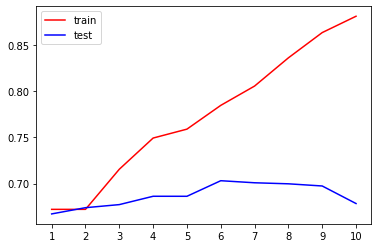

In [ ]:
tr = []
te = []
for i in range(10):
    clf = DecisionTreeClassifier(
        random_state=25
        , max_depth = i + 1
        # , criterion = 'entropy'
        )
    clf = clf.fit(Xtrain,Ytrain)
    score_tr = clf.score(Xtrain,Ytrain)
    score_te = cross_val_score(clf,x,y,cv=10).mean()
    tr.append(score_tr)
    te.append(score_te)
print(max(te))

plt.plot(range(1,11),tr,color="red",label="train")
plt.plot(range(1,11),te,color="blue",label="test")
plt.xticks(range(1,11))
plt.legend()
plt.show

## 5 调参

网格搜索：枚举


In [ ]:
gini_threholds = np.linspace(0,0.5,50)
# 定义好模型
clf = DecisionTreeClassifier(random_state=25)
# 定义调整的参数
parameters = {
    "criterion" : ("gini","entropy")
    , "splitter" : ("best","random")
    , "max_depth" : [*range(1,10)]
    , "min_samples_leaf" : [*range(1,50,5)]
    , "min_impurity_decrease" : [*np.linspace(0,0.5,50)] 
}
# 定义网格参数

GS = GridSearchCV(clf,parameters,cv=10)
GS = GS.fit(Xtrain,Ytrain)
score = clf.score(Xtest,Ytest)
score

In [ ]:
GS.best_params_
GS.best_score_